# Q3.1: Revised Team 22 Project

### Comments received
1. You may consider using geographical features to differentiate the carparks from each other.
Also, instead of using one ML model per carpark, we would recommend to use one model for all carparks.

2. The “web/phone application or integration with established wayfinding applications” is interesting and a good purpose, but it does not suit the theme of this module as much as doing data analysis. Do allocate your time and resources wisely if your team decide to do this.

### Revision of project
Having internalised the comments, we have decided to use a model for all carparks. By comparing 3 models (MLP,LR and LSTM), we will use the final selected model to predict a user-specified carpark availability for the next 24 hours.


### Preamble
With the steadily increasing motor vehicle population in Singapore of 957,006 in 2018 to 988,755 in 2021, parking demand also experiences an upward trend. Parking has become a major traffic issue for not only vehicle owners but also to local authorities in charge of allocating scarce land resources.

### Proposed Solution
In summary, our group wishes to create a carpark recommendation system with the ability to forecast demand. Determining the carpark’s demand at certain timeframes will be done using time-series forecast which utilised historical data to predict future demand trends. This system generally benefits vehicle owners but can be extended to be gain insights into state planning (land allocation for vehicle parking or congestion). 

From a user’s perspective, users could provide the destination (in GPS 
coordinates) and the system will provide the top-n nearest carparks and their respective current available lots. If users were to specify a timeframe in the future, they will be able to view a demand forecast graph (as seen in figure below) in hourly intervals. This feature allows users to plan their trips accordingly to avoid peak demand periods. 

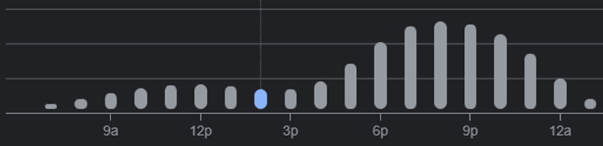


In [1]:
import pandas as pd
import numpy as np

# Data cleaning and preparation

We start by loading data from July to September 2022.

In [2]:
def load_data(month, days=31):
    full_df = pd.read_csv(f"./data/2022-{str(month)}-1.csv")
    for date in range(2, days+1):
        test_df = pd.read_csv(f'./data/2022-{str(month)}-{date}.csv')
        full_df = pd.concat([full_df, test_df])
    full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])
    full_df = full_df.set_index('timestamp')
    return full_df

In [3]:
jul = load_data(7)
aug = load_data(8)
sep = load_data(9, days=30)
full_data = pd.concat([jul, aug, sep])
full_data.dropna(inplace=True)

In [4]:
full_data['available rate'] = full_data['lots_available'] / full_data['total_lots']
full_data.dropna(inplace=True)
grped_full = full_data.groupby(full_data.carpark_number)

In [5]:
for key, item in grped_full:
    print(grped_full.get_group(key), "\n\n")

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A10          64              26        C   
2022-07-01 00:30:00            A10          64              26        C   
2022-07-01 00:45:00            A10          64              25        C   
2022-07-01 01:00:00            A10          64              22        C   
2022-07-01 01:15:00            A10          64              23        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A10          62              34        C   
2022-09-30 20:00:00            A10          62              30        C   
2022-09-30 21:00:00            A10          62              36        C   
2022-09-30 22:00:00            A10          62              33        C   
2022-09-30 23:00:00            A10          62              33        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A44         157              43        C   
2022-07-01 00:30:00            A44         157              42        C   
2022-07-01 00:45:00            A44         157              43        C   
2022-07-01 01:00:00            A44         157              42        C   
2022-07-01 01:15:00            A44         157              43        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A44         157              52        C   
2022-09-30 20:00:00            A44         157              52        C   
2022-09-30 21:00:00            A44         157              50        C   
2022-09-30 22:00:00            A44         157              47        C   
2022-09-30 23:00:00            A44         157              48        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A75         354             137        C   
2022-07-01 00:30:00            A75         354             135        C   
2022-07-01 00:45:00            A75         354             135        C   
2022-07-01 01:00:00            A75         354             134        C   
2022-07-01 01:15:00            A75         354             129        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A75         354             205        C   
2022-09-30 20:00:00            A75         354             182        C   
2022-09-30 21:00:00            A75         354             176        C   
2022-09-30 22:00:00            A75         354             163        C   
2022-09-30 23:00:00            A75         354             154        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           AM81         222             109        C   
2022-07-01 00:30:00           AM81         222             108        C   
2022-07-01 00:45:00           AM81         222             108        C   
2022-07-01 01:00:00           AM81         222             109        C   
2022-07-01 01:15:00           AM81         222             108        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           AM81         222             154        C   
2022-09-30 20:00:00           AM81         222             141        C   
2022-09-30 21:00:00           AM81         222             125        C   
2022-09-30 22:00:00           AM81         222             123        C   
2022-09-30 23:00:00           AM81         222             113        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           B45A          75              14        C   
2022-07-01 00:30:00           B45A          75              14        C   
2022-07-01 00:45:00           B45A          75              14        C   
2022-07-01 01:00:00           B45A          75              14        C   
2022-07-01 01:15:00           B45A          75              14        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           B45A          75              14        C   
2022-09-30 20:00:00           B45A          75              14        C   
2022-09-30 21:00:00           B45A          75              14        C   
2022-09-30 22:00:00           B45A          75              14        C   
2022-09-30 23:00:00           B45A          75              14        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B8B         249             129        C   
2022-07-01 00:30:00            B8B         249             125        C   
2022-07-01 00:45:00            B8B         249             125        C   
2022-07-01 01:00:00            B8B         249             125        C   
2022-07-01 01:15:00            B8B         249             124        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B8B         249             150        C   
2022-09-30 20:00:00            B8B         249             132        C   
2022-09-30 21:00:00            B8B         249             133        C   
2022-09-30 22:00:00            B8B         249             136        C   
2022-09-30 23:00:00            B8B         249             136        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BE34         303             108        C   
2022-07-01 00:30:00           BE34         303             105        C   
2022-07-01 00:45:00           BE34         303             103        C   
2022-07-01 01:00:00           BE34         303             101        C   
2022-07-01 01:15:00           BE34         303             102        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BE34         303             182        C   
2022-09-30 20:00:00           BE34         303             171        C   
2022-09-30 21:00:00           BE34         303             160        C   
2022-09-30 22:00:00           BE34         303             148        C   
2022-09-30 23:00:00           BE34         303             138        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ38         216             106        C   
2022-07-01 00:30:00           BJ38         216             106        C   
2022-07-01 00:45:00           BJ38         216             107        C   
2022-07-01 01:00:00           BJ38         216             106        C   
2022-07-01 01:15:00           BJ38         216             107        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ38         216             144        C   
2022-09-30 20:00:00           BJ38         216             130        C   
2022-09-30 21:00:00           BJ38         216             123        C   
2022-09-30 22:00:00           BJ38         216             110        C   
2022-09-30 23:00:00           BJ38         216             109        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BKE7         172             156        C   
2022-07-01 00:30:00           BKE7         172             156        C   
2022-07-01 00:45:00           BKE7         172             155        C   
2022-07-01 01:00:00           BKE7         172             155        C   
2022-07-01 01:15:00           BKE7         172             155        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BKE7         172             120        C   
2022-09-30 20:00:00           BKE7         172              97        C   
2022-09-30 21:00:00           BKE7         172             100        C   
2022-09-30 22:00:00           BKE7         172             125        C   
2022-09-30 23:00:00           BKE7         172             146        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            BRM         469             176        C   
2022-07-01 00:30:00            BRM         469             175        C   
2022-07-01 00:45:00            BRM         469             171        C   
2022-07-01 01:00:00            BRM         469             169        C   
2022-07-01 01:15:00            BRM         469             168        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            BRM         469             281        C   
2022-09-30 20:00:00            BRM         469             262        C   
2022-09-30 21:00:00            BRM         469             233        C   
2022-09-30 22:00:00            BRM         469             232        C   
2022-09-30 23:00:00            BRM         469             212        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             C8         347             176        C   
2022-07-01 00:30:00             C8         347             174        C   
2022-07-01 00:45:00             C8         347             173        C   
2022-07-01 01:00:00             C8         347             174        C   
2022-07-01 01:15:00             C8         347             173        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             C8         347             250        C   
2022-09-30 20:00:00             C8         347             199        C   
2022-09-30 21:00:00             C8         347             200        C   
2022-09-30 22:00:00             C8         347             181        C   
2022-09-30 23:00:00             C8         347             180        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK46         673             264        C   
2022-07-01 00:30:00           CK46         673             261        C   
2022-07-01 00:45:00           CK46         673             266        C   
2022-07-01 01:00:00           CK46         673             266        C   
2022-07-01 01:15:00           CK46         673             258        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK46         673             417        C   
2022-09-30 20:00:00           CK46         673             390        C   
2022-09-30 21:00:00           CK46         673             368        C   
2022-09-30 22:00:00           CK46         673             344        C   
2022-09-30 23:00:00           CK46         673             326        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            CR1         129              41        C   
2022-07-01 00:30:00            CR1         129              42        C   
2022-07-01 00:45:00            CR1         129              42        C   
2022-07-01 01:00:00            CR1         129              40        C   
2022-07-01 01:15:00            CR1         129              44        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            CR1         124               0        C   
2022-09-30 20:00:00            CR1         124               0        C   
2022-09-30 21:00:00            CR1         124               0        C   
2022-09-30 22:00:00            CR1         124              16        C   
2022-09-30 23:00:00            CR1         124              14        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           GE1G          45               1        C   
2022-07-01 00:30:00           GE1G          45               1        C   
2022-07-01 00:45:00           GE1G          45               1        C   
2022-07-01 01:00:00           GE1G          45               1        C   
2022-07-01 01:15:00           GE1G          45               1        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           GE1G          45               2        C   
2022-09-30 20:00:00           GE1G          45               2        C   
2022-09-30 21:00:00           GE1G          45               2        C   
2022-09-30 22:00:00           GE1G          45               2        C   
2022-09-30 23:00:00           GE1G          45               2        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG17         225              37        C   
2022-07-01 00:30:00           HG17         225              35        C   
2022-07-01 00:45:00           HG17         225              33        C   
2022-07-01 01:00:00           HG17         225              31        C   
2022-07-01 01:15:00           HG17         225              32        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG17         225              81        C   
2022-09-30 20:00:00           HG17         225              67        C   
2022-09-30 21:00:00           HG17         225              66        C   
2022-09-30 22:00:00           HG17         225              65        C   
2022-09-30 23:00:00           HG17         225              57        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG48         837             244        C   
2022-07-01 00:30:00           HG48         837             244        C   
2022-07-01 00:45:00           HG48         837             235        C   
2022-07-01 01:00:00           HG48         837             231        C   
2022-07-01 01:15:00           HG48         837             227        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG48         837             466        C   
2022-09-30 20:00:00           HG48         837             434        C   
2022-09-30 21:00:00           HG48         837             387        C   
2022-09-30 22:00:00           HG48         837             341        C   
2022-09-30 23:00:00           HG48         837             310        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J14         192              45        C   
2022-07-01 00:30:00            J14         192              41        C   
2022-07-01 00:45:00            J14         192              41        C   
2022-07-01 01:00:00            J14         192              42        C   
2022-07-01 01:15:00            J14         192              42        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J14         192              90        C   
2022-09-30 20:00:00            J14         192              80        C   
2022-09-30 21:00:00            J14         192              81        C   
2022-09-30 22:00:00            J14         192              75        C   
2022-09-30 23:00:00            J14         192              55        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J64         330             304        C   
2022-07-01 00:30:00            J64         330             305        C   
2022-07-01 00:45:00            J64         330             306        C   
2022-07-01 01:00:00            J64         330             304        C   
2022-07-01 01:15:00            J64         330             305        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J64         330             261        C   
2022-09-30 20:00:00            J64         330             272        C   
2022-09-30 21:00:00            J64         330             284        C   
2022-09-30 22:00:00            J64         330             288        C   
2022-09-30 23:00:00            J64         330             302        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            JB2          55               0        C   
2022-07-01 00:30:00            JB2          55               0        C   
2022-07-01 00:45:00            JB2          55               0        C   
2022-07-01 01:00:00            JB2          55               0        C   
2022-07-01 01:15:00            JB2          55               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            JB2          55               0        C   
2022-09-30 20:00:00            JB2          55               0        C   
2022-09-30 21:00:00            JB2          55               0        C   
2022-09-30 22:00:00            JB2          55               0        C   
2022-09-30 23:00:00            JB2          55               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            JM8         478             364        C   
2022-07-01 00:30:00            JM8         478             364        C   
2022-07-01 00:45:00            JM8         478             364        C   
2022-07-01 01:00:00            JM8         478             364        C   
2022-07-01 01:15:00            JM8         478             364        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            JM8         478             364        C   
2022-09-30 20:00:00            JM8         478             364        C   
2022-09-30 21:00:00            JM8         478             364        C   
2022-09-30 22:00:00            JM8         478             364        C   
2022-09-30 23:00:00            JM8         478             364        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            KJ2         104              58        C   
2022-07-01 00:30:00            KJ2         104              57        C   
2022-07-01 00:45:00            KJ2         104              55        C   
2022-07-01 01:00:00            KJ2         104              54        C   
2022-07-01 01:15:00            KJ2         104              55        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            KJ2         104              51        C   
2022-09-30 20:00:00            KJ2         104              41        C   
2022-09-30 21:00:00            KJ2         104              39        C   
2022-09-30 22:00:00            KJ2         104              44        C   
2022-09-30 23:00:00            KJ2         104              37        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            MN1         257              50        C   
2022-07-01 00:30:00            MN1         257              49        C   
2022-07-01 00:45:00            MN1         257              47        C   
2022-07-01 01:00:00            MN1         257              48        C   
2022-07-01 01:15:00            MN1         257              48        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            MN1         257             115        C   
2022-09-30 20:00:00            MN1         257              96        C   
2022-09-30 21:00:00            MN1         257              89        C   
2022-09-30 22:00:00            MN1         257              81        C   
2022-09-30 23:00:00            MN1         257              59        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           P40L           6               0        C   
2022-07-01 00:30:00           P40L           6               1        C   
2022-07-01 00:45:00           P40L           6               0        C   
2022-07-01 01:00:00           P40L           6               1        C   
2022-07-01 01:15:00           P40L           6               1        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           P40L           6               0        C   
2022-09-30 20:00:00           P40L           6               0        C   
2022-09-30 21:00:00           P40L           6               0        C   
2022-09-30 22:00:00           P40L           6               2        C   
2022-09-30 23:00:00           P40L           6               5        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL30         204              41        C   
2022-07-01 00:30:00           PL30         204              41        C   
2022-07-01 00:45:00           PL30         204              41        C   
2022-07-01 01:00:00           PL30         204              41        C   
2022-07-01 01:15:00           PL30         204              39        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL30         204             116        C   
2022-09-30 20:00:00           PL30         204             104        C   
2022-09-30 21:00:00           PL30         204              97        C   
2022-09-30 22:00:00           PL30         204              89        C   
2022-09-30 23:00:00           PL30         204              71        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PM14         428             138        C   
2022-07-01 00:30:00           PM14         428             136        C   
2022-07-01 00:45:00           PM14         428             134        C   
2022-07-01 01:00:00           PM14         428             132        C   
2022-07-01 01:15:00           PM14         428             131        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PM14         428             274        C   
2022-09-30 20:00:00           PM14         428             257        C   
2022-09-30 21:00:00           PM14         428             243        C   
2022-09-30 22:00:00           PM14         428             208        C   
2022-09-30 23:00:00           PM14         428             183        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PR10         725             329        C   
2022-07-01 00:30:00           PR10         725             332        C   
2022-07-01 00:45:00           PR10         725             328        C   
2022-07-01 01:00:00           PR10         725             325        C   
2022-07-01 01:15:00           PR10         725             328        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PR10         725             458        C   
2022-09-30 20:00:00           PR10         725             428        C   
2022-09-30 21:00:00           PR10         725             407        C   
2022-09-30 22:00:00           PR10         725             398        C   
2022-09-30 23:00:00           PR10         725             363        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           RHM4         282              69        C   
2022-07-01 00:30:00           RHM4         282              69        C   
2022-07-01 00:45:00           RHM4         282              69        C   
2022-07-01 01:00:00           RHM4         282              69        C   
2022-07-01 01:15:00           RHM4         282              69        C   
...                            ...         ...             ...      ...   
2022-09-30 20:00:00           RHM4         282             168        C   
2022-09-30 21:00:00           RHM4         282             168        C   
2022-09-30 22:00:00           RHM4         282             168        C   
2022-09-30 23:00:00           RHM4         282             168        C   
2022-09-30 23:00:00           RHM4           7               0        Y   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SB29         628             392        C   
2022-07-01 00:30:00           SB29         628             387        C   
2022-07-01 00:45:00           SB29         628             385        C   
2022-07-01 01:00:00           SB29         628             385        C   
2022-07-01 01:15:00           SB29         628             386        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SB29         628             456        C   
2022-09-30 20:00:00           SB29         628             444        C   
2022-09-30 21:00:00           SB29         628             431        C   
2022-09-30 22:00:00           SB29         628             416        C   
2022-09-30 23:00:00           SB29         628             409        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SE28         186             110        C   
2022-07-01 00:30:00           SE28         186             109        C   
2022-07-01 00:45:00           SE28         186             108        C   
2022-07-01 01:00:00           SE28         186             108        C   
2022-07-01 01:15:00           SE28         186             106        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SE28         186             139        C   
2022-09-30 20:00:00           SE28         186             131        C   
2022-09-30 21:00:00           SE28         186             136        C   
2022-09-30 22:00:00           SE28         186             131        C   
2022-09-30 23:00:00           SE28         186             122        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK14         445             228        C   
2022-07-01 00:30:00           SK14         445             226        C   
2022-07-01 00:45:00           SK14         445             225        C   
2022-07-01 01:00:00           SK14         445             223        C   
2022-07-01 01:15:00           SK14         445             223        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK14         445             317        C   
2022-09-30 20:00:00           SK14         445             297        C   
2022-09-30 21:00:00           SK14         445             288        C   
2022-09-30 22:00:00           SK14         445             269        C   
2022-09-30 23:00:00           SK14         445             257        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK58        1164             545        C   
2022-07-01 00:30:00           SK58        1164             542        C   
2022-07-01 00:45:00           SK58        1164             541        C   
2022-07-01 01:00:00           SK58        1164             538        C   
2022-07-01 01:15:00           SK58        1164             533        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK58        1164             787        C   
2022-09-30 20:00:00           SK58        1164             757        C   
2022-09-30 21:00:00           SK58        1164             737        C   
2022-09-30 22:00:00           SK58        1164             686        C   
2022-09-30 23:00:00           SK58        1164             646        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            SM3         149              83        C   
2022-07-01 00:30:00            SM3         149              84        C   
2022-07-01 00:45:00            SM3         149              83        C   
2022-07-01 01:00:00            SM3         149              83        C   
2022-07-01 01:15:00            SM3         149              83        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            SM3         149              93        C   
2022-09-30 20:00:00            SM3         149              84        C   
2022-09-30 21:00:00            SM3         149              73        C   
2022-09-30 22:00:00            SM3         149              83        C   
2022-09-30 23:00:00            SM3         149              82        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            T48         648             424        C   
2022-07-01 00:30:00            T48         648             424        C   
2022-07-01 00:45:00            T48         648             424        C   
2022-07-01 01:00:00            T48         648             424        C   
2022-07-01 01:15:00            T48         648             424        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            T48         648             299        C   
2022-09-30 20:00:00            T48         648             290        C   
2022-09-30 21:00:00            T48         648             264        C   
2022-09-30 22:00:00            T48         648             227        C   
2022-09-30 23:00:00            T48         648             190        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TBM7         529             378        C   
2022-07-01 00:30:00           TBM7         529             378        C   
2022-07-01 00:45:00           TBM7         529             378        C   
2022-07-01 01:00:00           TBM7         529             378        C   
2022-07-01 01:15:00           TBM7         529             378        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TBM7         529             434        C   
2022-09-30 20:00:00           TBM7         529             427        C   
2022-09-30 21:00:00           TBM7         529             412        C   
2022-09-30 22:00:00           TBM7         529             398        C   
2022-09-30 23:00:00           TBM7         529             381        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TJSF         842             829        C   
2022-07-01 00:30:00           TJSF         842             829        C   
2022-07-01 00:45:00           TJSF         842             829        C   
2022-07-01 01:00:00           TJSF         842             829        C   
2022-07-01 01:15:00           TJSF         842             829        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TJSF         842             829        C   
2022-09-30 20:00:00           TJSF         842             829        C   
2022-09-30 21:00:00           TJSF         842             829        C   
2022-09-30 22:00:00           TJSF         842             829        C   
2022-09-30 23:00:00           TJSF         842             829        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TM53         343             250        C   
2022-07-01 00:30:00           TM53         343             249        C   
2022-07-01 00:45:00           TM53         343             250        C   
2022-07-01 01:00:00           TM53         343             250        C   
2022-07-01 01:15:00           TM53         343             250        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TM53         343             267        C   
2022-09-30 20:00:00           TM53         343             267        C   
2022-09-30 21:00:00           TM53         343             263        C   
2022-09-30 22:00:00           TM53         343             268        C   
2022-09-30 23:00:00           TM53         343             264        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TPM8         800             334        C   
2022-07-01 00:30:00           TPM8         800             333        C   
2022-07-01 00:45:00           TPM8         800             330        C   
2022-07-01 01:00:00           TPM8         800             328        C   
2022-07-01 01:15:00           TPM8         800             326        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TPM8         800             510        C   
2022-09-30 20:00:00           TPM8         800             490        C   
2022-09-30 21:00:00           TPM8         800             457        C   
2022-09-30 22:00:00           TPM8         800             426        C   
2022-09-30 23:00:00           TPM8         800             413        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            U31         348             180        C   
2022-07-01 00:30:00            U31         348             181        C   
2022-07-01 00:45:00            U31         348             178        C   
2022-07-01 01:00:00            U31         348             179        C   
2022-07-01 01:15:00            U31         348             175        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            U31         348             225        C   
2022-09-30 20:00:00            U31         348             212        C   
2022-09-30 21:00:00            U31         348             206        C   
2022-09-30 22:00:00            U31         348             203        C   
2022-09-30 23:00:00            U31         348             182        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             W1        1000              53        C   
2022-07-01 00:30:00             W1        1000              53        C   
2022-07-01 00:45:00             W1        1000              53        C   
2022-07-01 01:00:00             W1        1000              53        C   
2022-07-01 01:15:00             W1        1000              53        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             W1        1000              53        C   
2022-09-30 20:00:00             W1        1000              53        C   
2022-09-30 21:00:00             W1        1000              53        C   
2022-09-30 22:00:00             W1        1000              53        C   
2022-09-30 23:00:00             W1        1000              53        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             W5         355             159        C   
2022-07-01 00:30:00             W5         355             154        C   
2022-07-01 00:45:00             W5         355             150        C   
2022-07-01 01:00:00             W5         355             150        C   
2022-07-01 01:15:00             W5         355             149        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             W5         355             244        C   
2022-09-30 20:00:00             W5         355             229        C   
2022-09-30 21:00:00             W5         355             211        C   
2022-09-30 22:00:00             W5         355             187        C   
2022-09-30 23:00:00             W5         355             177        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           W783         390             186        C   
2022-07-01 00:30:00           W783         390             184        C   
2022-07-01 00:45:00           W783         390             182        C   
2022-07-01 01:00:00           W783         390             184        C   
2022-07-01 01:15:00           W783         390             184        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           W783         390             271        C   
2022-09-30 20:00:00           W783         390             252        C   
2022-09-30 21:00:00           W783         390             247        C   
2022-09-30 22:00:00           W783         390             232        C   
2022-09-30 23:00:00           W783         390             211        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             Y3         403              91        C   
2022-07-01 00:30:00             Y3         403              83        C   
2022-07-01 00:45:00             Y3         403              84        C   
2022-07-01 01:00:00             Y3         403              85        C   
2022-07-01 01:15:00             Y3         403              83        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             Y3         403             177        C   
2022-09-30 20:00:00             Y3         403             155        C   
2022-09-30 21:00:00             Y3         403             143        C   
2022-09-30 22:00:00             Y3         403             132        C   
2022-09-30 23:00:00             Y3         403             129        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           Y75M         379             327        C   
2022-07-01 00:30:00           Y75M         379             327        C   
2022-07-01 00:45:00           Y75M         379             327        C   
2022-07-01 01:00:00           Y75M         379             327        C   
2022-07-01 01:15:00           Y75M         379             327        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           Y75M         379             327        C   
2022-09-30 20:00:00           Y75M         379             327        C   
2022-09-30 21:00:00           Y75M         379             327        C   
2022-09-30 22:00:00           Y75M         379             327        C   
2022-09-30 23:00:00           Y75M         379             327        C   

                     ava

For each carpark, we use the first 70% as training data and last 30% as testing data. We will use previous 8*24 hours availability as features to predict the next 24 hours availability.
We slice out the data for each carpark and resample them to fill in missing values. Then we prepare training and testing features and labels.

In [6]:
# helper method to create inputs and outputs from a given dataset
def prep_train_test(dataset, feature_len):
    X = []
    Y = []
    for i in range(feature_len, len(dataset)-24):
        X.append(dataset['available rate'][i-feature_len:i].values)
        Y.append(dataset['available rate'][i:i+24].values)
        # if np.isnan(X[-1]).any():
        #     print(X[-1])
        # if np.isnan(Y[-1]).any():
        #     print(Y[-1])
    return X, Y

In [22]:
carparks = grped_full.carpark_number.unique()
print(carparks)
trainX, trainY = [], []
testX, testY = [], []
feature_len = 24*8
split = 0.3
print("total ids:", len(carparks))
index = 0
for id in carparks:
    slice = grped_full.get_group(id[0])
    slice = slice.resample('1h').mean()
    if slice.shape[0] != 2208:
        print(slice.shape[0])
        print("Lossy data. Dropped")
        continue
    if slice.isnull().values.any():
        slice.fillna(method='ffill', inplace=True)
    split_index = int(slice.shape[0] * split)
    X_train1, Y_train1 = prep_train_test(slice[:split_index], feature_len)
    X_test1, Y_test1 = prep_train_test(slice[split_index:], feature_len)
    trainX.extend(X_train1)
    trainY.extend(Y_train1)
    testX.extend(X_test1)
    testY.extend(Y_test1)
    index += 1
    if index % 100 == 0:
        print(index, "done")
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)


carpark_number
A10      [A10]
A100    [A100]
A11      [A11]
A12      [A12]
A13      [A13]
         ...  
Y78M    [Y78M]
Y8        [Y8]
Y82M    [Y82M]
Y9        [Y9]
YHS      [YHS]
Name: carpark_number, Length: 1965, dtype: object
total ids: 1965
855
Lossy data. Dropped
100 done
200 done
300 done
400 done
500 done
730
Lossy data. Dropped
730
Lossy data. Dropped
600 done
700 done
800 done
900 done
1000 done
1100 done
83
Lossy data. Dropped
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done


In [8]:
display(testY)

array([[0.6640625 , 0.625     , 0.625     , ..., 0.40234375, 0.4140625 ,
        0.42578125],
       [0.625     , 0.625     , 0.6171875 , ..., 0.4140625 , 0.42578125,
        0.48046875],
       [0.625     , 0.6171875 , 0.5078125 , ..., 0.42578125, 0.48046875,
        0.4609375 ],
       ...,
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.55497159,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.55497159, 0.328125  ,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.328125  ,
        0.328125  ]])

In [15]:
print("train test length:", trainX.shape, trainY.shape)
print("testing test length:", testX.shape, testY.shape)
print("input shape:", trainX[0].shape)
print("output shape:", trainY[0].shape)

train test length: (874606, 192) (874606, 24)
testing test length: (2608130, 192) (2608130, 24)
input shape: (192,)
output shape: (24,)


# Finding the best model
The following section shows the deliberation behind the decision of the final model. This is an extension of question 2 where we have found the linear regression model to be the best performing out of the 3 pre-selected models with Support Vector Regressor and Decision Tree Regressor models as the alternatives. Here, we have experimented with Multi-layer Perceptron(MLP) and Long Short-Term Memory(LSTM) models to arrive at our final decided model used in our simulated application where users can see the predicted availability of a carpark.

# Model 1: Multi-layer perceptron (MLP)

### In this section, we will use MLP model to predict the parking availability within the next 24 hours

In [10]:
# Import libraries
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
plt.style.use('ggplot')


In [11]:
## Q3 data
print(trainX.dtype,trainY.dtype)
print(testX.dtype,testY.dtype)
print(np.isnan(trainX).any() ,np.isnan(trainY).any())
print(np.isnan(testX).any() ,np.isnan(testY).any())
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

float64 float64
float64 float64
False False
False False
(874606, 192) (874606, 24)
(2608130, 192) (2608130, 24)


#### MLP regressor

In [ ]:
#Train the data with MLP regressor
model = MLPRegressor(activation='identity', hidden_layer_sizes=(200),
             max_iter=50, solver='adam', verbose=True, early_stopping=True)
model.fit(trainX, trainY)
print(model)

In [ ]:
# Saving the model
import pickle
filename = 'models/mlp_sklearn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [14]:
# Loading the model
import pickle
model = pickle.load(open(filename, 'rb'))
Y_pred = model.predict(testX)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

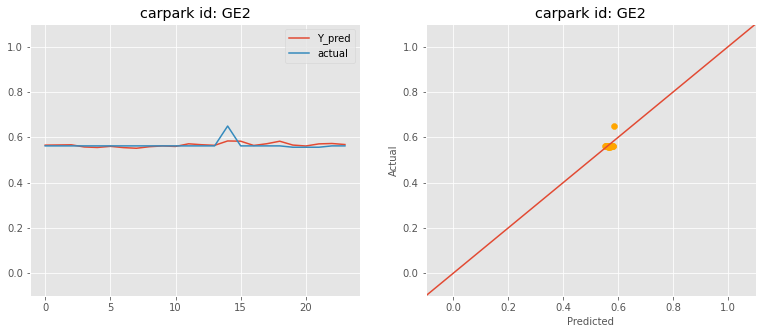

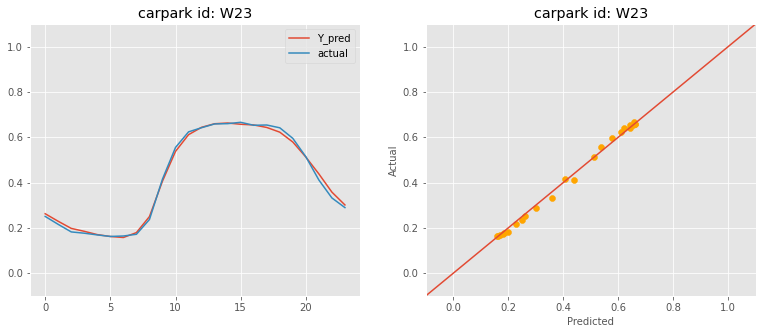

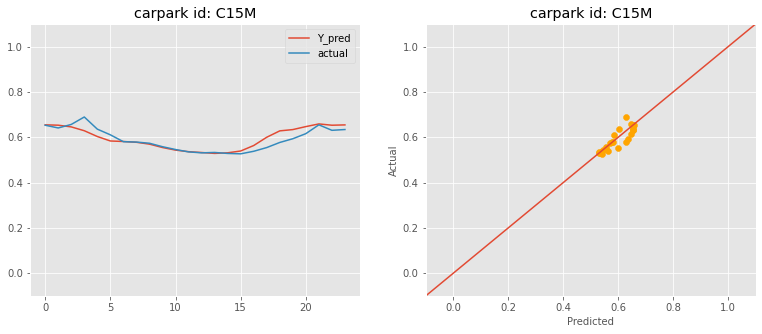

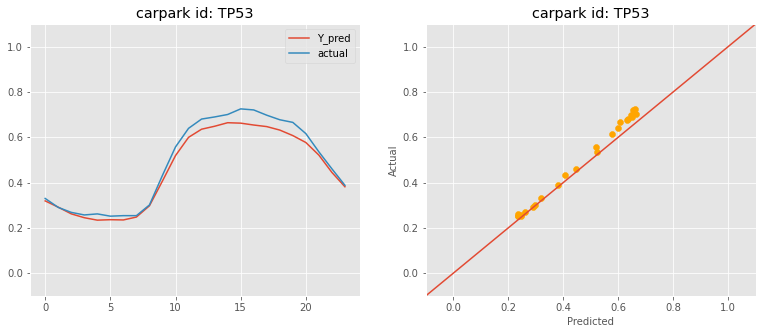

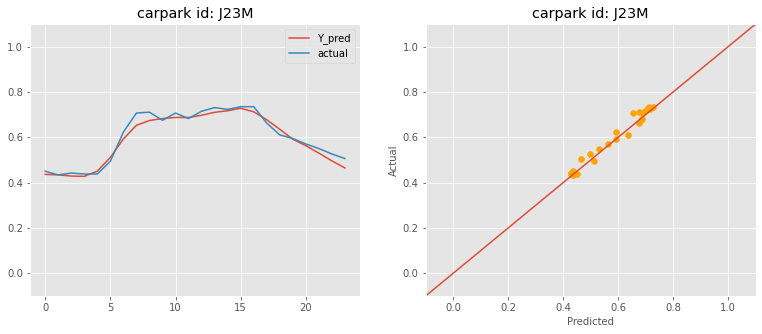

In [47]:
import random
for idx in range(5):
    idx = random.randint(0, len(testX))
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.plot(Y_pred[idx], label='Y_pred')
    plt.plot(testY[idx], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(Y_pred[idx], testY[idx], label='Y_pred', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

### General Performance
From the statistic below, The MLP model has a very high R Square value of 0.9476 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.13% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that MLP is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that MLP model is a good fit from Q2 and the above substantiation.

In [45]:
mlp_r2 = metrics.r2_score(testY, Y_pred)
mlp_mse = metrics.mean_squared_error(testY, Y_pred)
mlp_abs_error = mean_absolute_error(testY, Y_pred)
print(f"Model's r2score: {mlp_r2},\nMSE: {mlp_mse},\nMean Absolute Error: {mlp_abs_error*100} %")

Model's r2score: 0.9476901750206305,
MSE: 0.005626031969095141,
Mean Absolute Error: 4.137320245229594 %


## Error across time
Next we try to see how the performance of the model changes according to the prediction hours in future. This is done by plotting the performance metrics - r2score, mean squared error and mean absolute error, accross hours of prediction.

From the graph below, we can see that the model performs very well in the short run. Even though the MSE and MAE increases with prediction hours, the error peak is still within an acceptable range. The R2 score is around 0.93 at 24 hours which still indicates a good fit between actual and predicted values. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling

Text(0.5, 0, 'Hour')

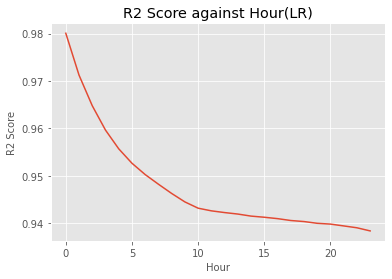

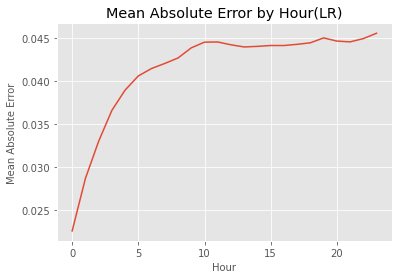

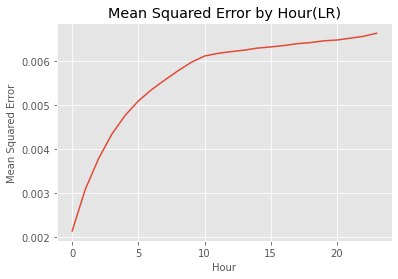

In [46]:
mlp_r2_ls = []
mlp_mse_ls = []
mlp_abs_error_ls = []
for i in range (24):
    mlp_r2_ls.append(metrics.r2_score(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_mse_ls.append(metrics.mean_squared_error(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_abs_error_ls.append(mean_absolute_error(testY.transpose()[i], Y_pred.transpose()[i]))
plt.figure()
plt.plot(mlp_r2_ls)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_abs_error_ls)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_mse_ls)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)



# Model 2: Linear Regression

In this section, we will use Linear Regression model to predict the parking availability of the next 24 hours. From Q2, we have established that LR model is has generally a better performance than SVR and DT. Here, we will investigate if it has better performance that MLP and LSTM.

First, we fit our LR model with the trainX and trainY. The training and test sets are derived from the original data set with a ratio of 70%:30% respectively.

In [30]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(trainX, trainY)

LinearRegression()

The following kernel is such that the train model will be saved for future runs (assuming training set remains the same).

In [63]:
# Saving the model
import pickle
pickle.dump(model_lr, open(filename, 'wb'))

In [31]:
# Loading the saved model
filename = 'models/lr_sklearn_model.sav'
model_lr = pickle.load(open(filename, 'rb'))
y_pred_lr = model_lr.predict(testX)
display(trainX)

array([[0.40104167, 0.33984375, 0.328125  , ..., 0.5859375 , 0.5625    ,
        0.51953125],
       [0.33984375, 0.328125  , 0.328125  , ..., 0.5625    , 0.51953125,
        0.46875   ],
       [0.328125  , 0.328125  , 0.32421875, ..., 0.51953125, 0.46875   ,
        0.453125  ],
       ...,
       [0.43772727, 0.43772727, 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.43772727, 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.40625   , 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ]])

In [73]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

This section will randomly select 10 carparks and display the actual and predicted data for the time frame. This is solely for visualisation purposes. 

randomList: [1103693, 415194, 1379983, 1171, 765396, 1888618, 1792732, 2268368, 2500032, 2233696]


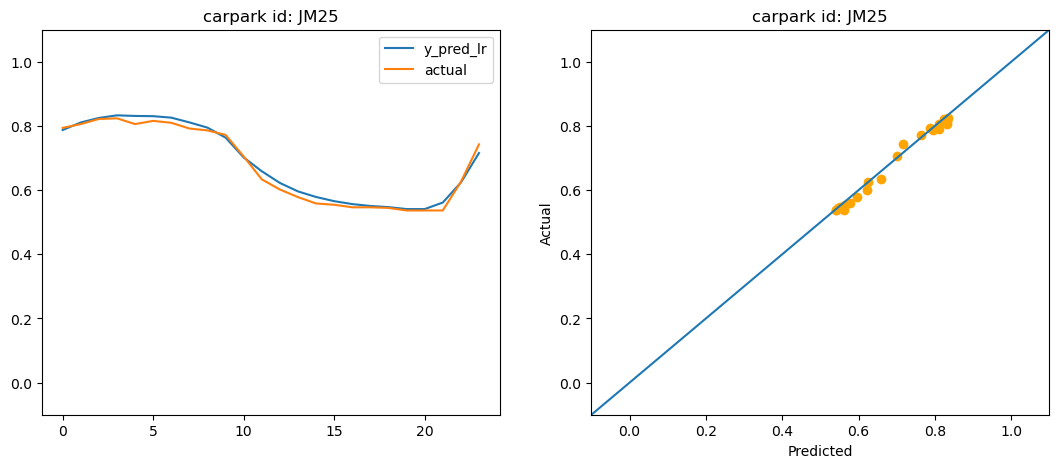

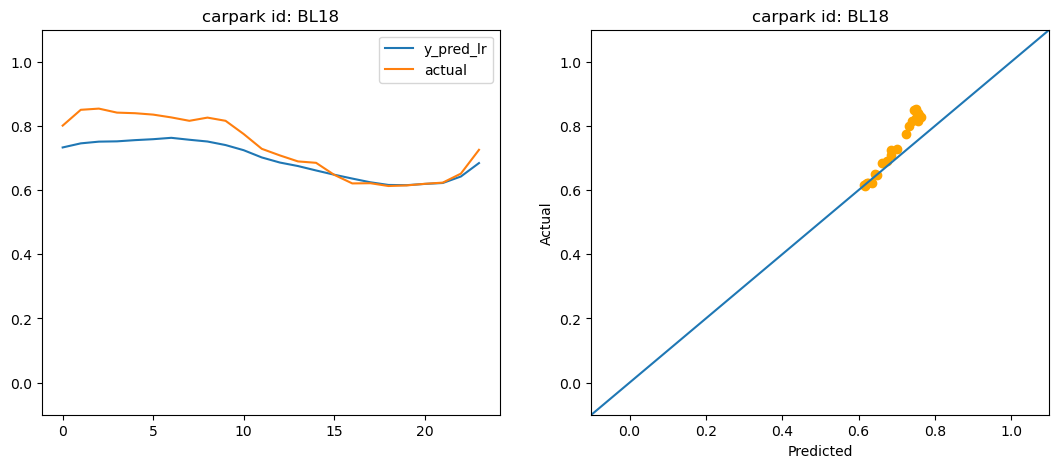

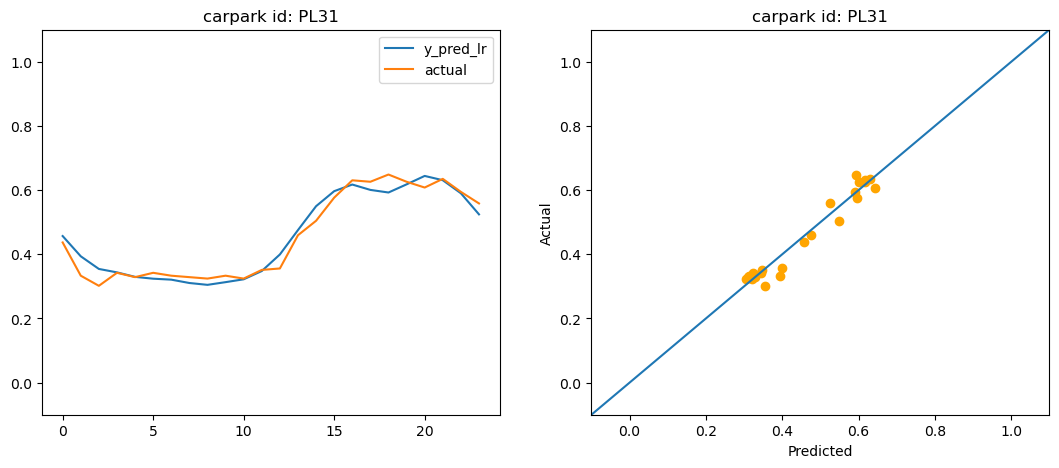

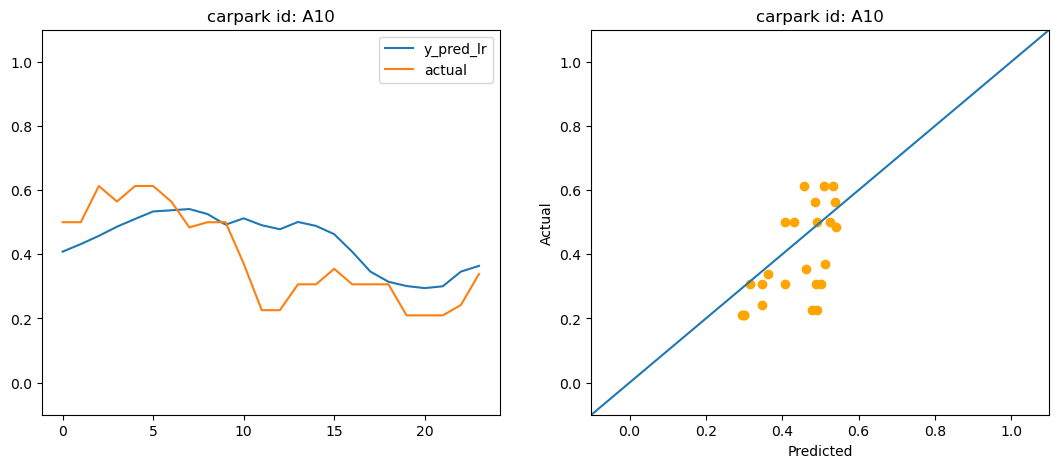

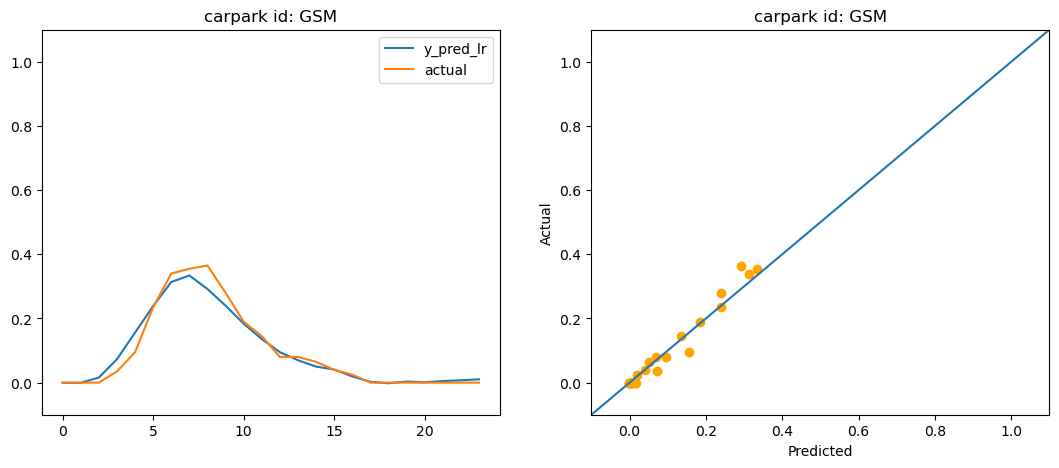

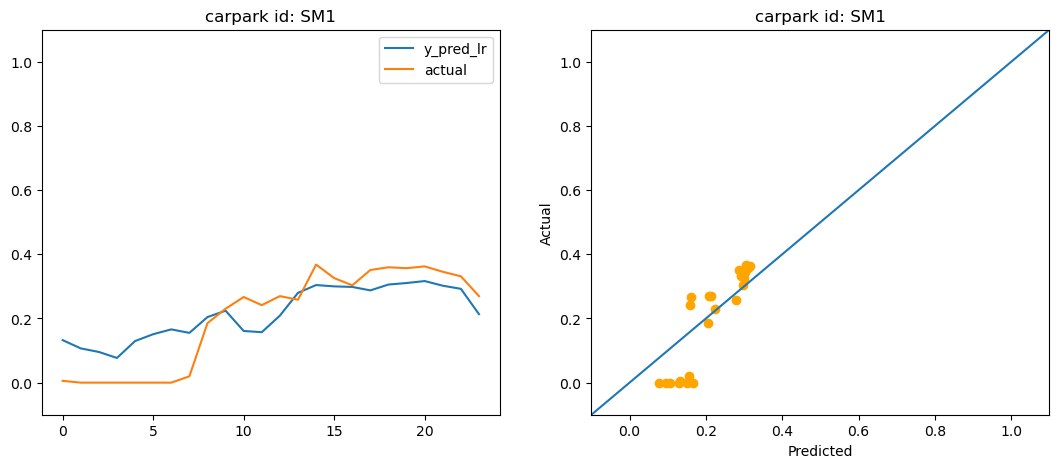

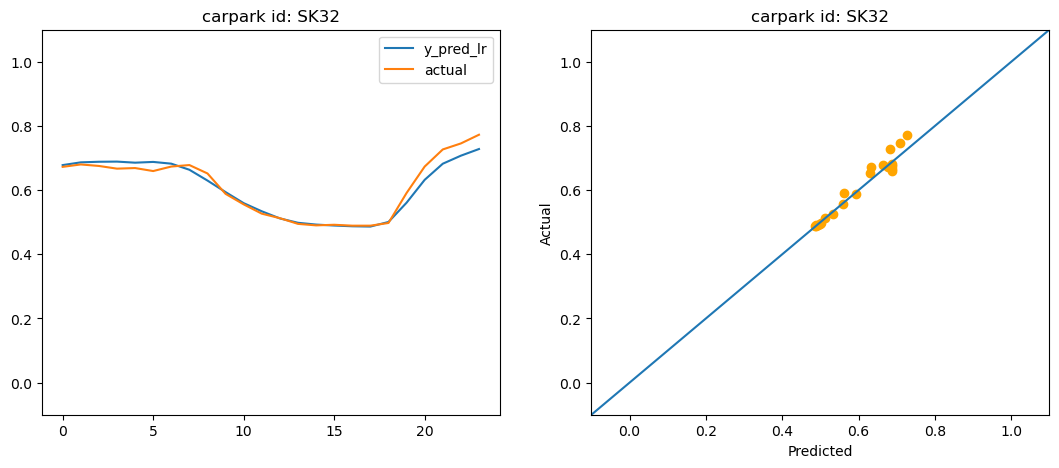

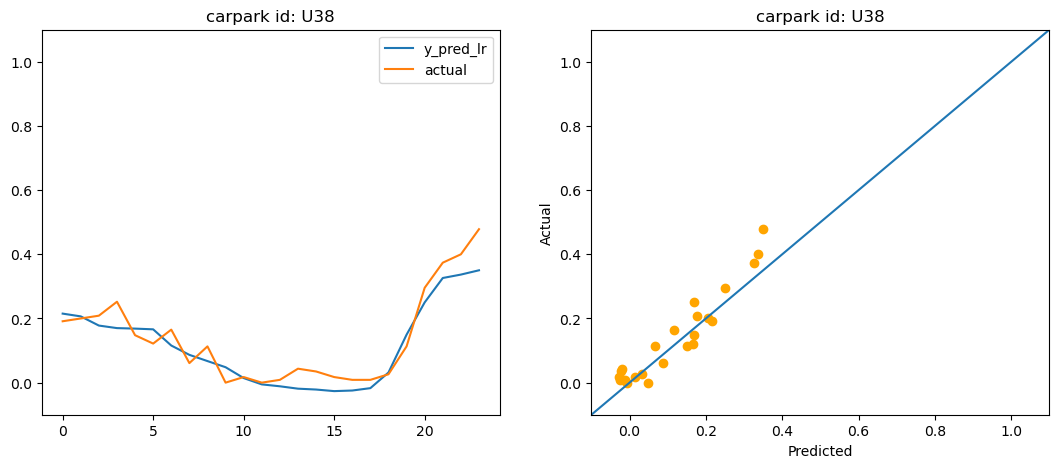

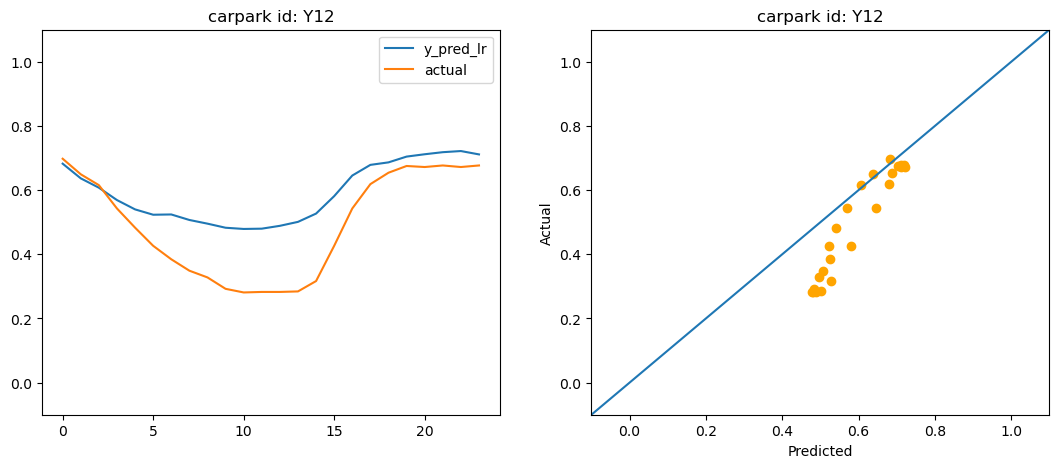

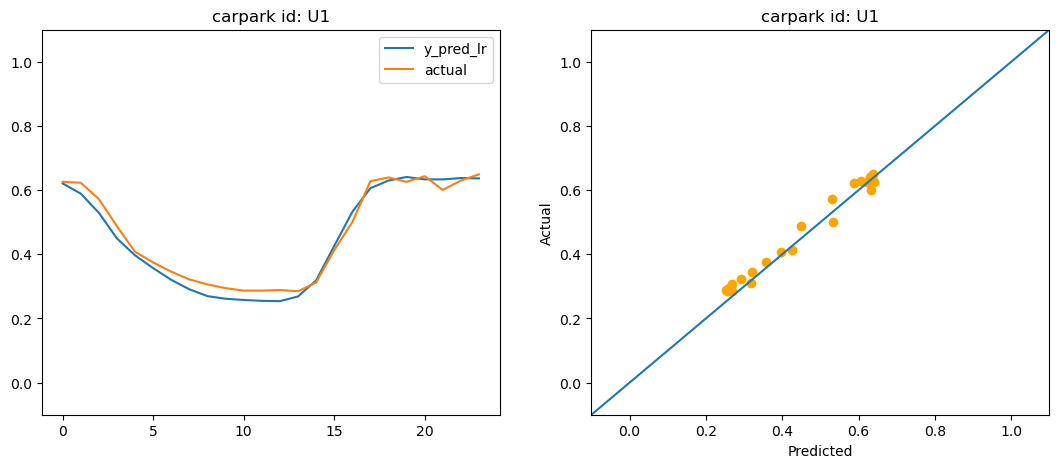

In [86]:
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
randomList = [random.randint(0,len(testY)) for i in range(10)]
print(f"randomList: {randomList}")

for i in randomList:
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.plot(y_pred_lr[i], label='y_pred_lr')
    plt.plot(testY[i], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(y_pred_lr[i], testY[i], label='y_pred_lr', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)


### Intepretation of model's performance
The LR model has a very high R Square value of 0.948 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.07% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that LR is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that LR model is a good fit from Q2 and the above substantiation.

In [87]:
lr_r2 = metrics.r2_score(testY, y_pred_lr)
lr_mse = metrics.mean_squared_error(testY, y_pred_lr)
lr_abs_error = mean_absolute_error(testY, y_pred_lr)
print(f"Model's r2score: {lr_r2},\nMSE: {lr_mse},\Percentage Error: {lr_abs_error*100} %\n")

Model's r2score: 0.9480106634767015,
MSE: 0.005591564842698372,\Percentage Error: 4.0711792803511395 %



### Error vs Time graph
From the graphs below, we can see that our predictions are extremely accurate in the short run and we can see that mean absolute error plateaus at a low value that is less than 0.045. The mean squared error can also be seen increasing at a decreasing rate to about 0.65% at 20hrs after the keyed in time. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling 



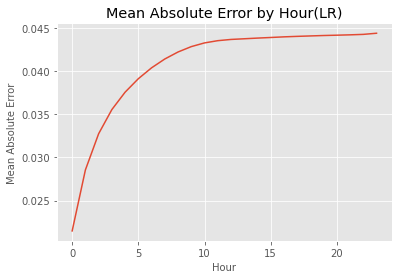

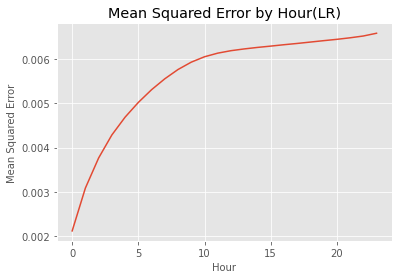

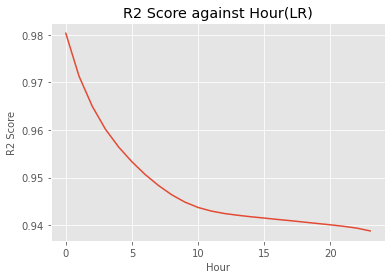

In [32]:
ae_by_hr = []
mse_by_hr = []
r2_by_hr = []
for i in range(24):
    # print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], y_pred_lr[:,i])) )
    # print("               R2 Score is {}" .format(r2_score(testY[:,i], y_pred_lr[:,i])) )
    mse = mean_squared_error(testY[:,i], y_pred_lr[:,i])
    ae = mean_absolute_error(testY[:,i], y_pred_lr[:,i])
    r2 = r2_score(testY[:,i], y_pred_lr[:,i])
    # print("               Absolute Error is {}%" .format(100*ae))
    ae_by_hr.append(ae)
    mse_by_hr.append(mse)
    r2_by_hr.append(r2)
plt.plot(ae_by_hr)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(mse_by_hr)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(r2_by_hr)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()

# Model 3: LSTM

This is a problem where, we are using the parking availability of the past 8*24 hours, to predict the parking availability of the next 24 hours. The data ranges from July 2022 to December 2022. 
The Long Short-Term Memory network, is a recurrent neural network trained usng backpropogation. It is a time series forecasting models can predict future values based on previous sequential data. Therefore, in this session,, we will investigate whether LSTM can outperfprm the other two models given this dataset. 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

Currently, the data is in theform of [samples, time steps], and we are framing the problem as one feature per time step. We can transform the prepared train and test input data into the expected structure as follows:

In [23]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX1 = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX2 = trainX1[2000:4000]
testX2 = testX1[2000:4000]
trainY2 = trainY[2000:4000]
testY2 = testY[2000:4000]
print(trainX.shape)
print(trainY.shape)

(874606, 192)
(874606, 24)


In [28]:
# create and fit the LSTM network
modelX = Sequential()
modelX.add(LSTM(8, input_shape=(192,1), activation="relu"))
modelX.add(Dense(24))
modelX.compile(loss='mean_squared_error', optimizer='adam')
modelX.fit(trainX1, trainY, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
6833/6833 - 454s - loss: 0.0191 - 454s/epoch - 66ms/step
Epoch 2/20
6833/6833 - 443s - loss: 0.0079 - 443s/epoch - 65ms/step
Epoch 3/20
6833/6833 - 434s - loss: 0.0076 - 434s/epoch - 64ms/step
Epoch 4/20
6833/6833 - 430s - loss: 0.0074 - 430s/epoch - 63ms/step
Epoch 5/20
6833/6833 - 427s - loss: 0.0074 - 427s/epoch - 63ms/step
Epoch 6/20
6833/6833 - 364s - loss: 0.0075 - 364s/epoch - 53ms/step
Epoch 7/20
6833/6833 - 354s - loss: 0.0073 - 354s/epoch - 52ms/step
Epoch 8/20
6833/6833 - 361s - loss: 0.0157 - 361s/epoch - 53ms/step
Epoch 9/20
6833/6833 - 360s - loss: 0.0073 - 360s/epoch - 53ms/step
Epoch 10/20
6833/6833 - 358s - loss: 0.0072 - 358s/epoch - 52ms/step
Epoch 11/20
6833/6833 - 368s - loss: 0.0073 - 368s/epoch - 54ms/step
Epoch 12/20
6833/6833 - 381s - loss: 0.0072 - 381s/epoch - 56ms/step
Epoch 13/20
6833/6833 - 360s - loss: 0.0071 - 360s/epoch - 53ms/step
Epoch 14/20
6833/6833 - 356s - loss: 0.0071 - 356s/epoch - 52ms/step
Epoch 15/20
6833/6833 - 359s - loss: 0.0070

In [30]:
# Save the model
# model.save('models/lstm_tf_model.h5')
modelX.save('models/lstm_tf_model_unit8.h5')

In [34]:
loaded = tf.keras.models.load_model('models/lstm_tf_model_unit8.h5')
ypred_lstm = loaded.predict(testX1)
print(ypred_lstm.shape)
#show model info
# print(modelX.summary())
# print(testX[0].shape)
# modelX(testX1[0])

81505/81505 [==============================] - 1070s 13ms/step
(2608130, 24)


This section will randomly select 10 carparks and display the actual and predicted data for the time frame. This is solely for visualisation purposes

In [35]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

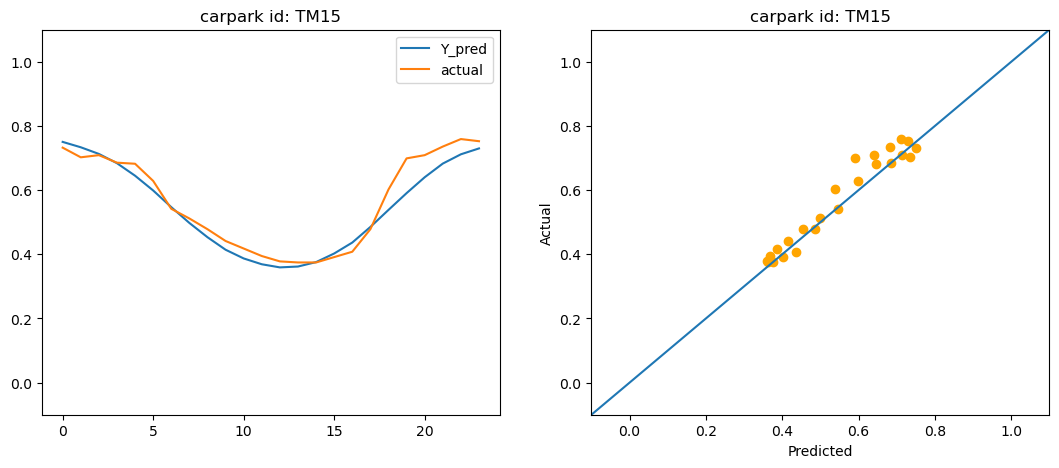

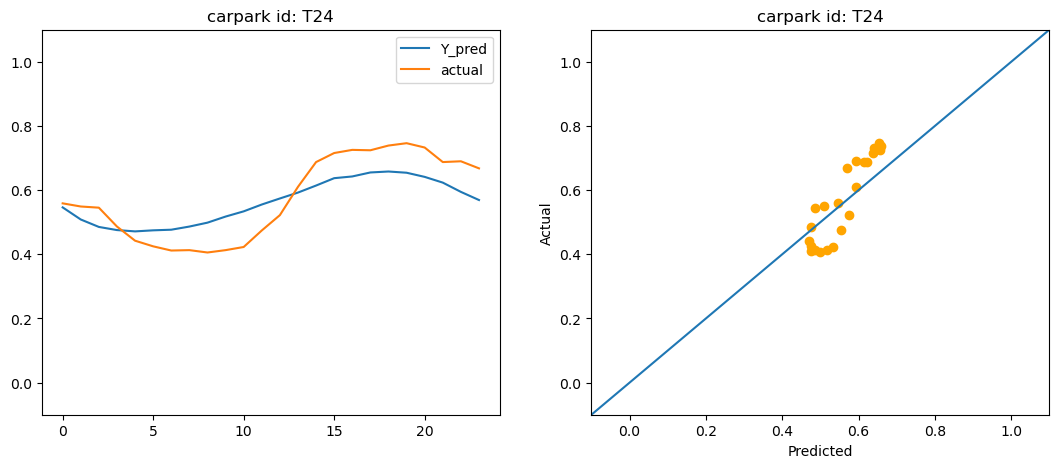

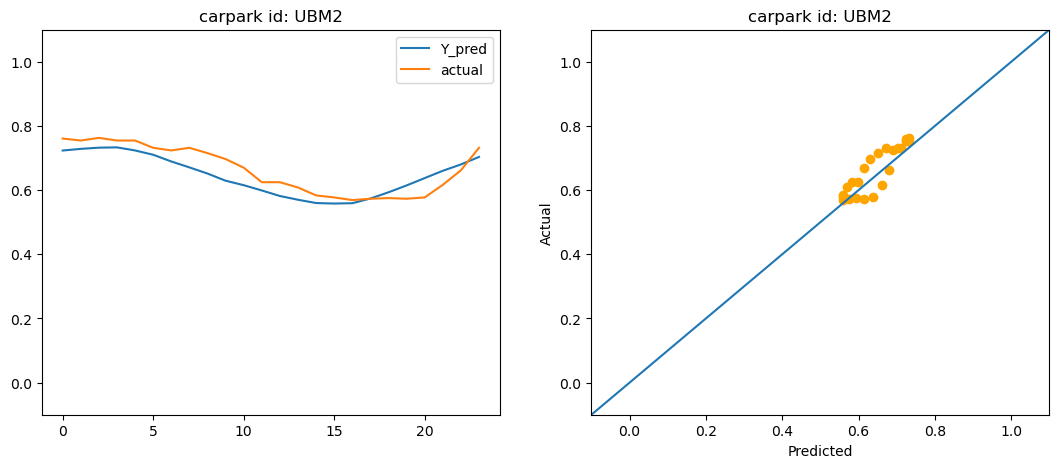

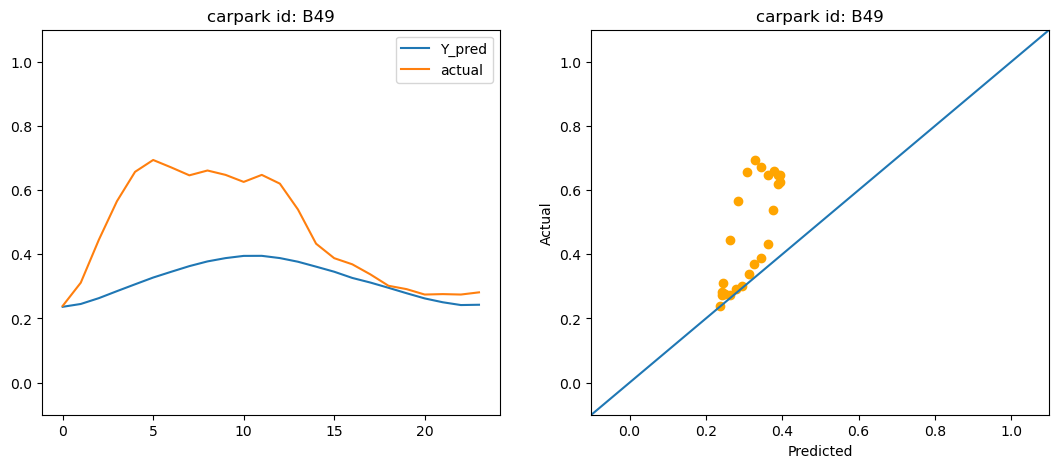

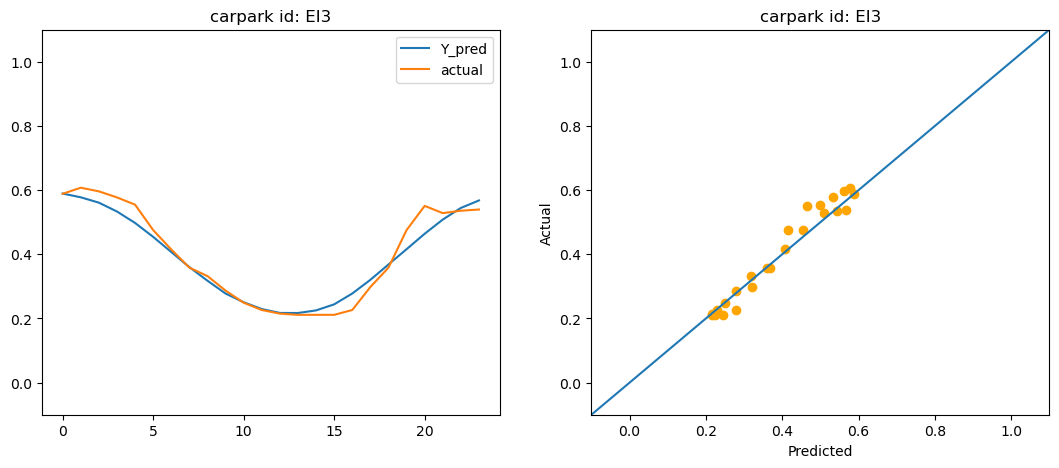

In [45]:
import random
for idx in range(5):
    idx = random.randint(0, len(testX))
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.plot(ypred_lstm[idx], label='Y_pred')
    plt.plot(testY[idx], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(ypred_lstm[idx], testY[idx], label='Y_pred', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

In [41]:
lstm_r2 = r2_score(testY, ypred_lstm)
lstm_mse = mean_squared_error(testY, ypred_lstm)
lstm_abs_error = mean_absolute_error(testY, ypred_lstm)
print(f"Model's r2score: {lstm_r2},\nMSE: {lstm_mse},\nMean Absolute Error: {lstm_abs_error*100} %")

Model's r2score: 0.9009966583042862,
MSE: 0.010647536071076396,
Mean Absolute Error: 6.860874575614105 %


In [46]:
for i in range(24):
    print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], ypred_lstm[:,i])) )
#     print("               R2 Score is {}" .format(r2_score(testY2[:,i], ypred_lstm[:,i])) )

Hour0:   MSE is 0.004096784166825654
Hour1:   MSE is 0.0066045304354307105
Hour2:   MSE is 0.00851557290695065
Hour3:   MSE is 0.01002962810624017
Hour4:   MSE is 0.011581101489212731
Hour5:   MSE is 0.0131146854598821
Hour6:   MSE is 0.014263473421478887
Hour7:   MSE is 0.014866188627236513
Hour8:   MSE is 0.01477502396917906
Hour9:   MSE is 0.014480356791013775
Hour10:   MSE is 0.013247497891061734
Hour11:   MSE is 0.012270993837999311
Hour12:   MSE is 0.011373737223416034
Hour13:   MSE is 0.010648243762690504
Hour14:   MSE is 0.010198666942218217
Hour15:   MSE is 0.009792908583174179
Hour16:   MSE is 0.009752942832263493
Hour17:   MSE is 0.009658664961461364
Hour18:   MSE is 0.009705334011323475
Hour19:   MSE is 0.009702021075026143
Hour20:   MSE is 0.009574883853904594
Hour21:   MSE is 0.009189313842300732
Hour22:   MSE is 0.008919100628059477
Hour23:   MSE is 0.009179210887427458


### Error vs Time graph

Text(0.5, 0, 'Hour')

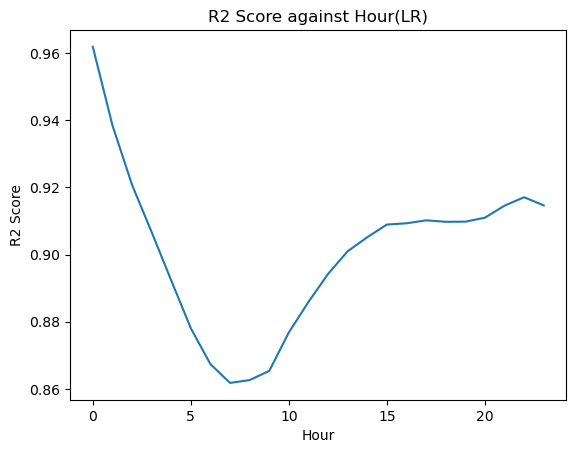

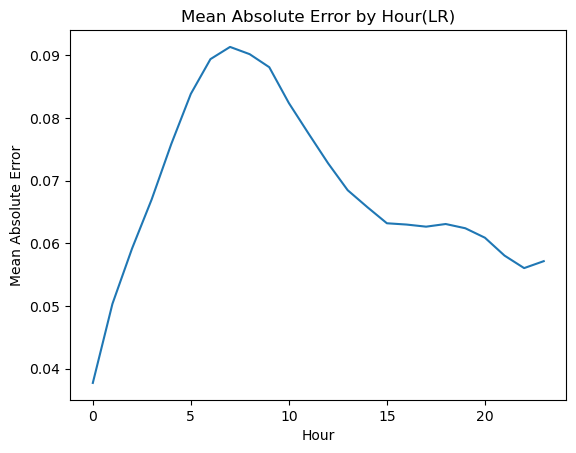

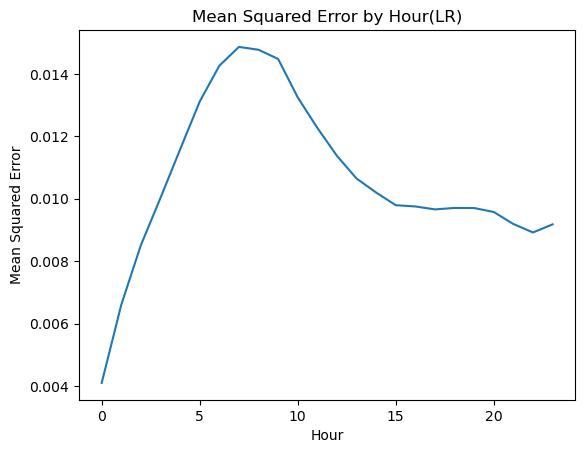

In [43]:
lstm_r2_ls = []
lstm_mse_ls = []
lstm_abs_error_ls = []
for i in range (24):
    lstm_r2_ls.append(r2_score(testY[:,i], ypred_lstm[:,i]))
    lstm_mse_ls.append(mean_squared_error(testY[:,i], ypred_lstm[:,i]))
    lstm_abs_error_ls.append(mean_absolute_error(testY[:,i], ypred_lstm[:,i]))
plt.figure()
plt.plot(lstm_r2_ls)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(lstm_abs_error_ls)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(lstm_mse_ls)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)

# Overall Flow

In [48]:
from queue import PriorityQueue
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd
import numpy as np
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

from api_utils import getDataAtTimestamp, json2csv, postalcode2xy

### Helper methods to our app

In [49]:
def update_rencet_csv(time_now, recent):
    '''
    update recent data from API and store locally in a csv file
    '''
    range = timedelta(hours=191)
    start = time_now - range
    end = time_now
    for date in pd.date_range(start, end, freq='1h'):
        if date not in recent.index:
            recent.loc[date] = np.nan
            year, month, day, hour, mins = date.year, date.month, date.day, date.hour, date.minute+1
            try:
                raw_data = getDataAtTimestamp(str(year), str(month), str(day), str(hour), str(mins))
            except:
                continue
            raw_df = json2csv(raw_data, date)
            raw_df['lots_available'] = raw_df['lots_available'].astype(float)
            raw_df['total_lots'] = raw_df['total_lots'].astype(float)
            raw_df['available rate'] = raw_df['lots_available'] / raw_df['total_lots']
            for id in raw_df.carpark_number:
                if id in recent.columns:
                    recent.loc[date, id] = raw_df[raw_df.carpark_number == id]['available rate'].values[0]
                else:
                    print("Id not seen!")
    recent.to_csv("./data/recent.csv")

def find_nearest(x, y, location_dict) -> List[Tuple[float, str]]:
    '''
    Sort carparks by distance to the given location
    '''
    shortest = PriorityQueue()
    for key, (loc, addr) in location_dict.items():
        dist = (loc[0] - x)**2 + (loc[1] - y)**2
        shortest.put((-dist, key))
    size = shortest.qsize()
    res = [shortest.get() for i in range(size)]
    res.reverse()
    return res

def create_location_dict(loc_info: pd.DataFrame) -> Dict[str, Tuple[Tuple[float, float], str]]:
    '''
    Create a dictionary of carparks' location and address with carpark number as key
    '''
    location_dict = {}
    for row in loc_info.iterrows():
        content = row[1]
        name = content[0]
        addr = content[1]
        location = (content[2], content[3])
        location_dict[name] = (location, addr)
    return location_dict

def init():
    '''
    Initialize the app data, including recent data, location dictionary and model
    '''
    model = pickle.load(open('models/mlp_sklearn_model.sav', 'rb'))
    print(colored("Model loaded!", "green"))
    recent = pd.read_csv("./data/recent.csv")
    recent['timestamp'] = pd.to_datetime(recent['timestamp'])
    recent = recent.set_index('timestamp')
    print(colored("Recent data loaded!", "green"))
    loc_info = pd.read_csv("./data/hdb-carpark-information.csv")
    location_info = create_location_dict(loc_info)
    return model, recent, location_info

def get_pred_inputs(recent: pd.DataFrame, id: str):
    '''
    Get the inputs for the model from the recent data based on the carpark number
    '''
    time_now = pd.Timestamp.now()
    time_now = time_now.floor('1h')
    range = timedelta(hours=191)
    if time_now not in recent.index:
        print(colored("Updating recent data! Please wait", "green"))
        update_rencet_csv(time_now, recent)
    most_recent = recent[id][time_now - range: time_now]
    return most_recent.values.reshape(1, -1)

def find_by_location(model,
                                    recent: pd.DataFrame,
                                    carpark_info: Dict[str, Tuple[Tuple[float, float], str]],
                                    x, y):
    """
    Find the nearest 5 carparks to the given location and predict the available rate
    """
    print(colored("Finding nearest carpark...", "green"))
    top5 = find_nearest(x, y, carpark_info)
    res = []
    for ele in top5:
        id = ele[1]
        if id not in recent.columns:
            print(f"We do not have data for the nearby carpark {id}")
            continue
        input = get_pred_inputs(recent, id)
        prediction = model.predict(input)[0]
        res.append((ele[0], ele[1], prediction))
        if (len(res) == 5):
            break
    return res

### main app flow

In [52]:
def app():
    model, recent, location_dict = init()
    print("* Welcome to the carpark availability prediction system")
    print("* Where would you like to go?")

    while True:
        postal_code = input("Enter your destination postal code: ")
        print(postal_code)
        try:
            x, y = postalcode2xy(postal_code)
            best_options = find_by_location(model, recent, location_dict, x, y)
            break
        except:
            print(colored("Invalid Postal Code! Please Try Again", "red"))

    print(colored("Best options is:"))
    print(colored(f"carpark {best_options[0][1]} with distance {-best_options[0][0]}", 'yellow'))
    print(colored("Alternatives are:"))
    for ele in best_options[1:]:
        print(colored(f"carpark {ele[1]} with distance {-ele[0]}"))

    time_now = pd.Timestamp.now()
    time_now = time_now.ceil('1h')
    ranges = [(time_now + timedelta(hours=i)).time() for i in range(0,24,4)]
    print(ranges)
    fig, axs = plt.subplots(min(5, len(best_options)+1), 1, figsize=(10, 25))
    for i in range(len(best_options)):
        axs[i].plot(best_options[i][2])
        axs[i].set_xticks(range(0, 24, 4))
        axs[i].set_xticklabels(ranges)
        axs[i].set_ylim(0, 1)
        axs[i].set_title(f"carpark at {location_dict[best_options[i][1]][1]}\n Distance {-best_options[i][0]}",fontsize=10)
    plt.show()


### Run the app

Model loaded!
Recent data loaded!
* Welcome to the carpark availability prediction system
* Where would you like to go?
Enter your destination postal code: 270030
270030
Finding nearest carpark...
Updating recent data! Please wait
req time =  1.0862441062927246 json time =  0.0020003318786621094
Id not seen!
Best options is:
carpark Q84 with distance 11457.105151665424
Alternatives are:
carpark Q87 with distance 17513.146257778713
carpark Q89 with distance 58391.34558473809
carpark Q68 with distance 79274.6719807031
carpark Q75M with distance 110094.70262320808
[datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0), datetime.time(0, 0)]


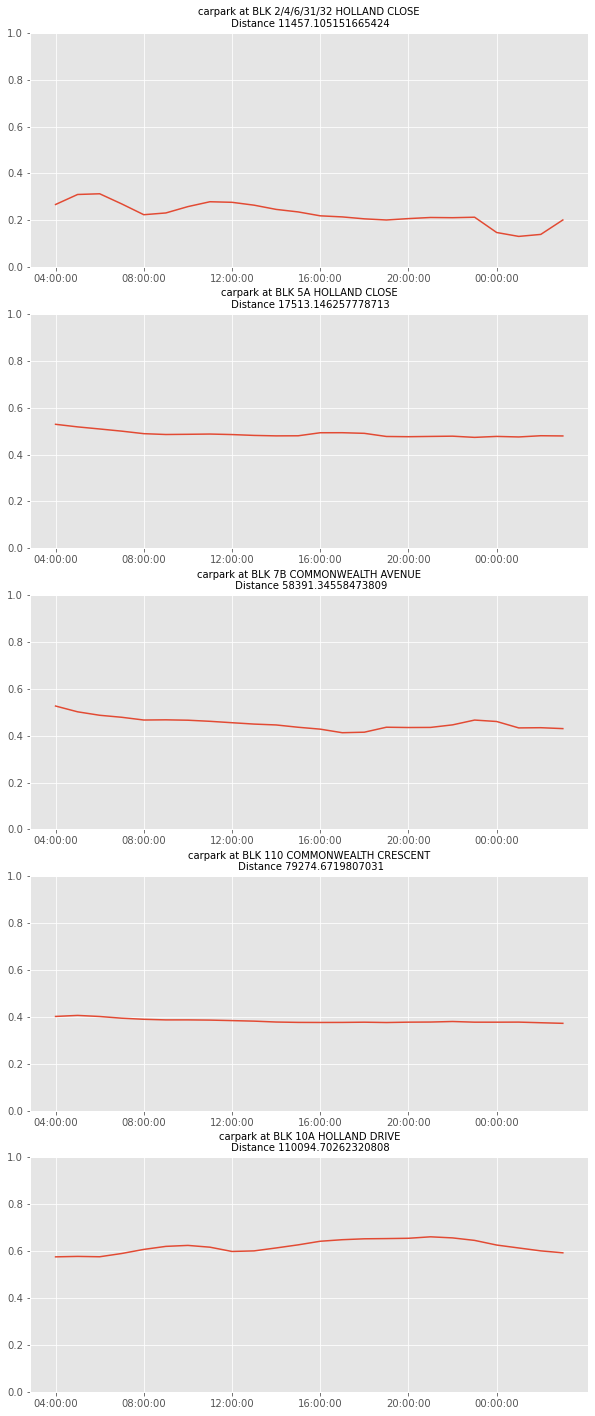

In [53]:
app()